# Figure 2 - TRex benchmarking

### Setups 

In [1]:
suppressPackageStartupMessages({
  library(dplyr)
  library(RColorBrewer)
  library(data.table)
  library(ggplot2)
  library(viridis)
  library(grid)
  library(gridExtra)
  library(patchwork)
  library(ggsci)
  library(ggpubr)
  library(ggrastr)
})

In [2]:
# Plot settings
col.pal <- colorRampPalette(colors = c("#FF0000","#FFFFFF","#0000FF"))
heatmap_theme<-list(
    theme_pubr(),
    theme(panel.border=element_blank(),
        plot.title = element_text(size = 20,face='bold',hjust = 0.5),
        panel.grid.major = element_blank(), 
        panel.grid = element_blank(),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        legend.position ="right",
        legend.title.align = 0,
        legend.title = element_text(size=14,face='bold'),
        legend.text = element_text(size=12),
        strip.background = element_rect(fill = "white",color = "white",linewidth = 1),
        strip.text = element_text(size=14,face="italic"),
        axis.text.x = element_text(angle=90,vjust=0.5),
        axis.title = element_text(face="bold",size=14),
        axis.line = element_blank()),
    scale_x_continuous(limits = c(0,0.5), breaks = c(0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45) , expand = c(-0.01, -0.01)),
    scale_y_continuous(limits = c(0,3), breaks = c(0,0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75),expand = c(-0.01, -0.01))
)

## Inputs

In [3]:
fig_dir<-"output"

In [4]:
# Effects
gt_cond_effect<-fread(file="input/gt_condition_effect.tsv")
gt_conf_effect<-fread(file="input/gt_confounder_effect.tsv")
pred_cond_effect<-fread(file="input/pred_condition_effect.tsv")
pred_conf_effect<-fread(file="input/pred_confounder_effect.tsv")

# Performance
trex.perf<-fread(file="input/mean_performance_trex_complex.tsv")
suppa.perf<-fread(file="input/mean_performance_suppa2.tsv")
rmats.perf<-fread(file="input/mean_performance_rmats.tsv")
trex_nb.perf<-fread(file="input/mean_performance_trex_simple.tsv")

## Visualizations

### Condition effect

In [5]:
cond_ref <- inner_join(pred_cond_effect,gt_cond_effect) %>%
            filter(abs(cell_lineSRSF9.KD_mean)>1e-6) # ground truth that couldn't be calculated because of zero counts

Joining, by = "event_id"


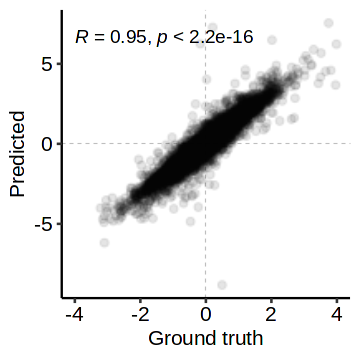

In [6]:
options(repr.plot.width=3,repr.plot.height=3)
p<-ggplot(cond_ref ,aes(x=cell_lineSRSF9.KD_mean,y=log2FoldChange_mean))+
    geom_vline(xintercept = 0,linewidth=0.25,color="grey",linetype="dashed")+
    geom_hline(yintercept = 0,linewidth=0.25,color="grey",linetype="dashed")+
    rasterise(geom_point(alpha=0.1))+
    labs(x="Ground truth",y="Predicted")+
    stat_cor(method="pearson",label.x.npc = "left",label.y.npc = "top")+
    theme_pubr()+
    scale_x_continuous(limits = c(-4,4),breaks = c(-4,-2,0,2,4))
ggsave(p,file=file.path(fig_dir,"condition_effects.pdf"),device="pdf",width = 3,height = 3)
p

### Confounder effect

In [7]:
conf_ref<-inner_join(pred_conf_effect,gt_conf_effect)%>%
            mutate(bes = paste("bes=",bes)) %>%
            filter(abs(batch_mean)>1e-6) # ground truth that couldn't be calculated because of zero counts

Joining, by = c("bes", "event_id")


In [8]:
options(repr.plot.width=4,repr.plot.height=4)
for(b in unique(conf_ref$bes)){
    p<-conf_ref %>%
        filter(bes==b) %>%
        ggplot(.,aes(x=batch_mean,y=log2FoldChange_mean))+
        geom_vline(xintercept = 0,linewidth=0.25,color="grey",linetype="dashed")+
        geom_hline(yintercept = 0,linewidth=0.25,color="grey",linetype="dashed")+
            rasterise(geom_point(alpha=0.1,size=1))+
            labs(x="Ground truth",y=paste0("Predicted (",b,")"))+
            stat_cor(method="pearson",label.x.npc = "left",label.y.npc = "top")+
            theme_pubr()+
            theme(text = element_text(size=16),
                  strip.background = element_rect(fill = "white",color = "white",size = 1),
                  strip.text = element_text(size=14,face="italic"))
    ggsave(p,file=file.path(fig_dir,paste0("conf_effects_bes",sub("bes =  ","",b),".pdf")),device="pdf",width = 3,height = 3)
}

Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


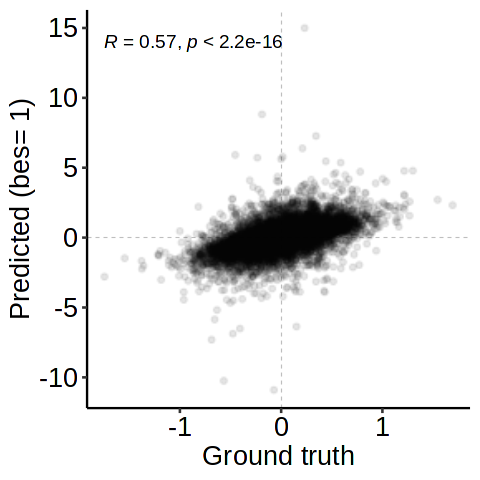

In [9]:
p

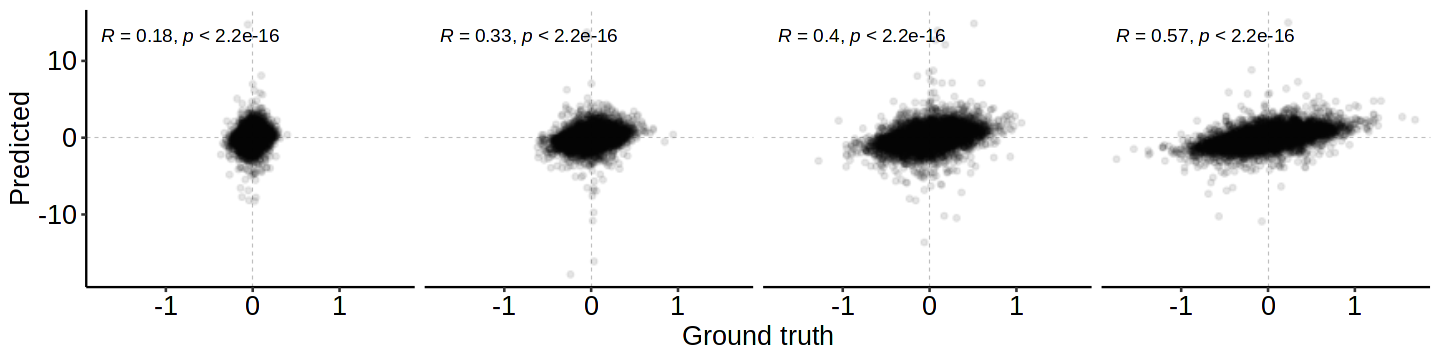

In [10]:
options(repr.plot.width=12,repr.plot.height=3)
p<-conf_ref %>%
    ggplot(.,aes(x=batch_mean,y=log2FoldChange_mean))+
    geom_vline(xintercept = 0,linewidth=0.25,color="grey",linetype="dashed")+
    geom_hline(yintercept = 0,linewidth=0.25,color="grey",linetype="dashed")+
        rasterise(geom_point(alpha=0.1,size=1))+
        labs(x="Ground truth",y="Predicted")+
        facet_wrap(~bes,ncol = 4)+
        stat_cor(method="pearson",label.x.npc = "left",label.y.npc = "top")+
        theme_pubr()+
        theme(text = element_text(size=16),
             strip.background = element_rect(fill = "white",color = "white",size = 1),
             strip.text = element_blank())
ggsave(p,file=file.path(fig_dir,"conf_effects_grid.pdf"),device="pdf",width = 12,height = 3)
p

### Differential performance

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“Removed 42 rows containing missing values (`geom_tile()`).”
Warning message:
“Removed 42 rows containing missing values (`geom_tile()`).”


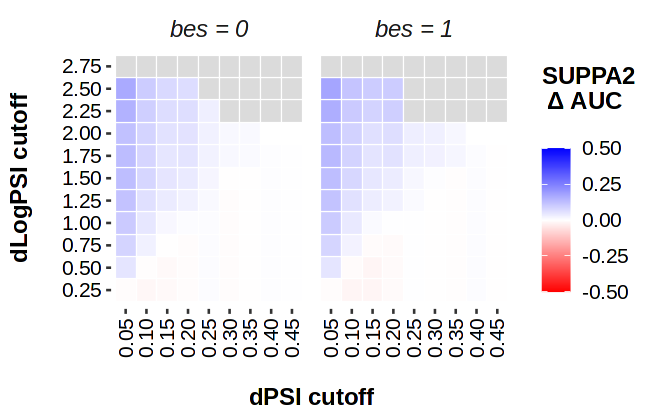

In [11]:
options(repr.plot.width=5.5, repr.plot.height=3.5)
p<-ggplot(suppa.perf,aes(x=dPSI_th,y=dLogitPSI_th,fill=dif_auc))+
    geom_tile(colour="white",size=0.25)+ 
    facet_wrap(~batch_effect,ncol=2)+
    labs(fill="SUPPA2\n \u0394 AUC   \n", x="\ndPSI cutoff",y="dLogPSI cutoff\n")+
    heatmap_theme+
    scale_fill_gradientn(colours = col.pal(25), limits=c(-0.5, 0.5),na.value = "grey86")
ggsave(p,file=file.path(fig_dir,"differential_performance_TRex_vs_SUPPA2.png"),width = 5.5,height = 3.5)
p

Warning message:
“Removed 42 rows containing missing values (`geom_tile()`).”
Warning message:
“Removed 42 rows containing missing values (`geom_tile()`).”


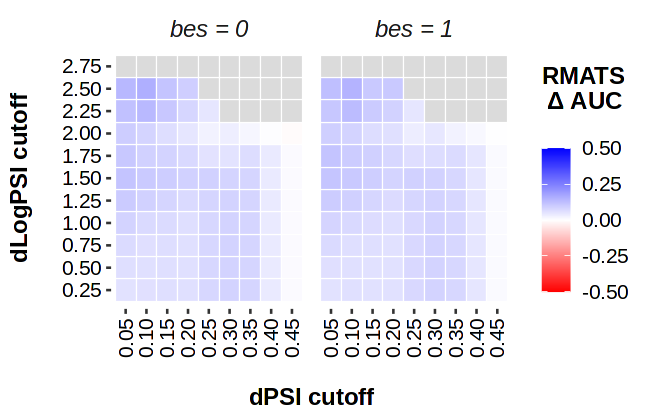

In [12]:
options(repr.plot.width=5.5, repr.plot.height=3.5)
p<-ggplot(rmats.perf,aes(x=dPSI_th,y=dLogitPSI_th,fill=dif_auc))+
    geom_tile(colour="white",size=0.25)+ 
    facet_wrap(~batch_effect,ncol=5)+
    labs(fill="RMATS\n \u0394 AUC   \n", x="\ndPSI cutoff",y="dLogPSI cutoff\n")+
    heatmap_theme+
    scale_fill_gradientn(colours = col.pal(25), limits=c(-0.5, 0.5),na.value = "grey86")
ggsave(p,file=file.path(fig_dir,"differential_performance_TRex_vs_RMATS.png"),width = 5.5,height = 3.5)
p